# Implementación de *A**
==================================

En este *Notebook* se realizará la implementación del algoritmo A\*, el cual funcionará primeramente sobre un grafo, y posteriormente sobre un mapa 2D (en concreto, algo *parecido* a un tablero).

---

<img style="float:left" width="70%" src="pics/Algoritmo-AStar-24Oct2019.png">

---
---

La implementación de A\* trabajará con nodos. Por tanto, no debería resultar complicado adaptar el algoritmo para que realice búsquedas en otro(s) tipo(s) de problemas.  

Para realizar dicha adaptación, sólo será necesario implementar nuevas funciones:  

1. De ***sucesores*** 
2. De ***meta*** 
3. De ***heurístico***.


```Python 

def AStar(inicial, sucesoresF, metaF, heuristicoF):
    '''
    Algoritmo A*. 
    Recibe
    =======
    inicial: Nodo inicial.
    
    sucesoresF: Función que toma un nodo y devuelve una lista de nodos sucesores (dependerá de cada problema).
    
    metaF: Función que toma un estado y devuelve "True" si es un estado meta (dependerá de cada problema).
    
    heuristicoF: Función que toma un estado, y devuelve un valor númerico con la estimación del coste restante para 
    llegar a una meta (dependerá de cada problema).
    
    Devuelve
    ========
    solución, i. e., [estado1, estado2,..., estadoN], o bien: [], si no hay.
    '''
    
    '''
    Creo Abiertos y Cerrados.
    Abiertos --> Se inicializará con el nodo inicial.
    Cerrados --> Estará vacía
    
    Mientras abiertos no esté vacía:
        recupero de abiertos el nodo con menor f (nodoActual).
        guardo nodoActual en cerrados.
        compruebo si es meta:
            si lo es devuelve el camino
        obtengo los sucesores, la función genera sucesores recibe a la que calcula la h
        para suc en sucesores:
            si no está en abiertos ni en cerrados 
                lo meto en abiertos
            está en abiertos pero suc tiene menor f
                lo actualizo en abiertos
            esta en cerrados pero suc tiene menor f
                lo elimino de cerrados y lo meto en abiertos
    Devuelvo [], no había solución
    '''
        
```     



_______

#### Implementa *AStar*  

---



In [1]:
def AStar(inicial, sucesoresF, metaF, heuristicoF):
        

               
    return []


## Implementaciones de *Nodo* y *Abiertos*

Versión completa y *utilizable* (por parte del alumnado) de lo pedido en *Busqueda_1*.

In [2]:
class Nodo:
    
    def __init__(self,estado,padre,g,f):
        self.estado=estado
        self.padre=padre
        self.g = g
        self.f = f
    def getPadre(self):
        return self.padre
    def getEstado(self):
        return self.estado
    def getG(self):
        return self.g
    def getF(self):
        return self.f
    
    def camino(self): 
        "Crea una lista de nodos desde la raiz hasta este nodo."
        
        # Quiero un "camino de nodos" o un "camino de estados"?
        # append(x.getEstado) o append(x)
        
        x = self
        result =  []
        while x:
            result.append(x.getEstado())
            x = x.getPadre()
        return list(reversed(result))
    
    def __repr__(self):
        return "Nodo "+str(self.estado)+"("+str(self.f)+")"
    
    def __lt__(self, other):
        return self.f<other.f
        

    def __eq__(self, other):
        
        return self.getEstado()==other.getEstado()
    

In [3]:
import queue as queue

class Abiertos():
    def __init__(self):
        self.colaPrioridad = queue.PriorityQueue()
    
    def put(self,nodo):
        self.colaPrioridad.put((nodo.getF(),nodo))
    
    def pop(self):
        return self.colaPrioridad.get()
    
    def empty(self):
        return self.colaPrioridad.empty();
    
    def getNodo(self,estado):
        for elem in self.colaPrioridad.queue:
            if elem[1].getEstado()==estado:
                return elem[1]
        return None           
    
    
    def update(self,nodoViejo,nodoNuevo):
        self.colaPrioridad.queue.remove((nodoViejo.getF(),nodoViejo))
        self.colaPrioridad.put((nodoNuevo.getF(),nodoNuevo))
        
    def getNodes(self):
        return list(map(lambda x:x[1],self.colaPrioridad.queue))
    
    def __str__(self):
        return str(self.colaPrioridad.queue)   
        
        


# El grafo de búsqueda

Para probar el algoritmo A\* en un problema sencillo, que tenga solución y *traza* conocidas, se va a crear un grafo usando la librería **networkx**. 

Hemos de considerar también que:

1. El *grafo* se crea con **nx.Graph()**. Si se usa **nx.DiGraph()**, estoy considerando que es de tipo/naturaleza dirigido(a).

2. Los *nodos* se crean con **add_node**.

3. Los *arcos* se crean con **add_edge**.

In [4]:
# Ejemplo de grafo básico
# =========================

import networkx as nx
import matplotlib.pyplot as plt

# Creo el grafo
Gprueba = nx.DiGraph()

# Escribo el nombre del nodo, como argumento
Gprueba.add_node(1)    
Gprueba.add_node(2)    
Gprueba.add_node(3)    

# Escribo los nombres de los nodos que forman el arco, como argumento(s)
Gprueba.add_edge(1,2)
Gprueba.add_edge(1,3)
Gprueba.add_edge(2,4)

# Consulto los hijos del nodo 1. El grafo "G" funciona como un diccionario
print("los hijos del nodo 1 son:")
print(list(Gprueba[1].keys()))


nx.draw(Gprueba)

los hijos del nodo 1 son:
[2, 3]


C:\Users\Olga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Olga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


---
---
##### Ejemplo de Grafo un poco más elaborado

Sabiendo estos conceptos básicos de creación de grafos, pasamos ahora a crear un grafo similar a los que se han podido ver en teoría.  

Tened en cuenta el siguiente dibujo:

<img style="float:left" width="60%" src="pics/GrafoDirigidoTeoria.png">


Grafo similar al de 'Teoría', para A*


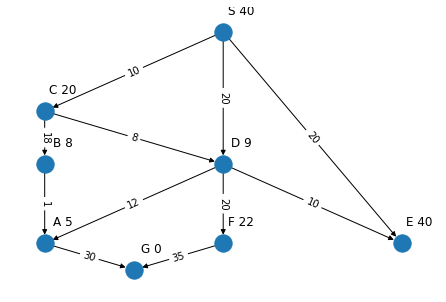

In [5]:
# Creación del grafo
# ==================

# Se ha de considerar que el "comienzo" está en "S", y el "final", en "G".


Grafo = nx.DiGraph()

# Este diccionario almacena los hijos que tiene cada padre
hijos = {'S': 'CDE','C': 'BD','B': 'A','D': 'AFE','A': 'G','F': 'G'}

# Este diccionario almacena los costes de cada camino
costes={('S', 'C'):10, ('S', 'D'): 20, ('S', 'E'): 20, ('C', 'B'): 18,
        ('C', 'D'): 8, ('B', 'A'): 1, ('D', 'A'): 12, ('D', 'F'): 20,
        ('D', 'E'): 10, ('A', 'G'): 30, ('F', 'G'): 35}

# Este diccionario almacena los valores heurísticos de cada estado.
heuristico = {'S': 40, 'C': 20, 'B': 8, 'D': 9, 'A': 5, 'F': 22, 'E': 40, 'G': 0}

# Este diccionario almacena las posiciones de cada nodo. Sólo es a efectos estéticos.
posiciones = {'S':(20,100),'C':(10,70),
              'B':(10,50),'D':(20,50),
              'A':(10,20),'F':(20,20),
              'E':(30,20),'G':(15,10)}

# Se crea el grafo, y se añaden: (1) nodos y (2) arcos
node_labels={}
for nodo in heuristico:
    Grafo.add_node(nodo)
    node_labels[nodo]=nodo+" "+str(heuristico[nodo])
    if nodo in hijos:
        for hijo in hijos[nodo]:
            Grafo.add_edge(nodo,hijo) 

# Se dibuja el grafo
nx.draw(Grafo,pos = posiciones)
# Se dibujan las etiquetas de los nodos y los arcos
node_label_pos = {k:[v[0]+1,v[1]+8] for k,v in posiciones.items()}
node_label_handles = nx.draw_networkx_labels(Grafo,pos = node_label_pos,labels = node_labels)
nx.draw_networkx_edge_labels(Grafo, pos = posiciones, edge_labels=costes)
print("Grafo similar al de 'Teoría', para A*")

# Funciones de *sucesores*, *meta* y *heurística*, sobre el grafo

A continuación se pueden ver cómo serían las funciones de: (1) *sucesores*, (2) *meta* y (3) *heurística*, para el problema de la búsqueda en el grafo.

- Para crear un nodo inicial, se le pasa:
    * El estado inicial (al constuctor de Nodo), 
    * Su nodo padre (que en el caso inicial sería *None*), 
    * El valor de **g** (**g** = 0) y 
    * El valor de **f** (**f** = **g**+**h**). En el caso inicial, como **g**=0, sólo haría falta **h**.  


- ***sucesoresGrafo***: Se obtienen los sucesores. Como el grafo 'Grafo' es un diccionario, solamente tenemos que consultar las claves disponibles. Se actualiza el valor de **g** usando el coste necesario para llegar al hijo que se *saca* del diccionario de costes. Se calcula la **h** invocando a la función *heuristicaF*.  


- ***metaGrafo***: Se hace la comparación de si el estado es o no es **G** (por ser el valor del estado *meta*). Mirad el grafo justo arriba (donde aparece **G**).  


- ***heuristicaGrafo***: Se hace la consulta en el *diccionario de valores heurísticos*.

In [6]:
nodoInicial = Nodo('S',None,0,heuristico['S'])

def sucesoresGrafo(nodo,heuristicaF):
    estado = nodo.getEstado()
    g = nodo.getG()
    hijos = []
    
    for hijo in Grafo[estado].keys():
        nuevaG = g+costes[(estado,hijo)]
        h=heuristicaF(hijo)
        
        hijos.append(Nodo(hijo,nodo,nuevaG,nuevaG+h))
        
    return hijos

def metaGrafo(nodo):
    estado = nodo.getEstado()
    return estado=='G' 

def heuristicaGrafo(estado):
    return heuristico[estado]                
    
print(heuristicaGrafo('S'))
print(metaGrafo(nodoInicial))
print(sucesoresGrafo(nodoInicial,heuristicaGrafo))
    


40
False
[Nodo C(30), Nodo D(29), Nodo E(60)]


In [7]:
AStar(nodoInicial,sucesoresGrafo, metaGrafo, heuristicaGrafo)

[]

# Trazas más ricas

A la hora de *mejorar* (por así decirlo) el algoritmo A\*, es posible que las listas de *Abiertos* y *Cerrados* sean tan grandes que cuando (por ejemplo) las *visualizáramos* (con un *print*) nos costara entender algo.

Se puede generar una tabla HTML con el resultado de una lista, usando **pandas**, una librería de *Python* para el tratamiento de tablas de datos que está incluida en **Anaconda**.




In [8]:
from IPython.display import display
import pandas as pd
import numpy as np

debugData =[]

columns = ["Actual","Abiertos", "Sucesores", "Cerrados"]
debugData.append(["Nodo actual",
                  str(list(range(1,20))),
                  str(["suc1","suc2","suc3"]),
                  str(list(range(1,20)))])

pd.DataFrame(np.array(debugData), columns=columns)

        

,Actual,Abiertos,Sucesores,Cerrados
0,Nodo actual,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","['suc1', 'suc2', 'suc3']","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


# Ejemplo de *path finding*

El mismo código de A\* se puede usar para resolver un problema del tipo denominado *path finding* (movimiento de un punto *A*, a un punto *B*), en una matriz 2D.

### Explicación de la representación del mapa y los estados

Hemos de considerar que:

* El mapa va a ser una lista 2D con 0's en las casillas libres, y 1's en las correspondientes a obstaculos.

* Un estado va a estar constituido por coordenadas: (y,x).

In [9]:
tablero = [[1,1,1,1,1,1,1,1],
           [1,0,0,0,0,0,0,1],
           [1,0,1,1,0,0,0,1],
           [1,0,1,0,0,1,1,1],
           [1,1,1,0,1,0,0,1],
           [1,0,1,0,0,0,0,1],
           [1,1,1,1,1,1,1,1]]

estadoInicialPF = (1,1) #y,x
estadoFinalPF = (5,6)

In [10]:
# posibles movimientos 
posiblesMovs = [[1,0],[-1,0],[0,1],[0,-1]]

```Python
'''
Ejercicio 1

Creación de una función "es_meta".

'''
def es_meta(nodo):
    global estadoFinalPF

    # Modifica la función para que compare el estado con "estadoFinal"
    return False
    
```

```Python
'''
Ejercicio 2

Creación de una función "es_valido".

Primero comprueba que la coordenada está dentro de los 
límites del tablero y luego que en el tablero haya un 0
en dichas coordenadas.
'''
def es_valida(estado):
    global tablero
    return False
```

```Python
''' 
Ejercicio 3

La distancia de "Manhattan" entre dos vectores: v1=[x1,y1] y v2=[x2,y2] sería: 

d(v1,v2) = |x1-x2| + |y1-y2|

donde: | | representa la operación matemática del "valor absoluto".

La cuestión ahora sería el calcular la distancia de "Manhattan" de un estado respecto a la meta.

'''

def heuristicaPF(estado):
    global estadoFinalPF
    
    # completa aqui
    
    return 0
```

```Python
''' 
Ejercicio 4

Cómo sería una función que, dado un estado, devuelva todos los estados sucesores válidos.

Pistas:
1 - Con un "for", se recorren los posibles movimientos.
    1.1 Se hace la suma del movimiento con el estado.
    1.2 se comprueba si es válido, y si lo es, se introduce en "hijos".
2 - Para introducir elementos en la lista de "hijos", se usa "append".
3 - El coste del padre al hijo es 1. La heurística es la distancia de "Manhattan", que se pasa como argumento.
'''

def sucesores(nodo,heuristicaF):
    hijos = []
    
    # Completad aquí
    
    return hijos
```

In [11]:
posiblesMovs = [[1,0],[-1,0],[0,1],[0,-1]]

# ============================================
# Implementa las funciones anteriores
# ============================================



In [12]:
def creaNodoInicialPF(ei,ef, tab, hPF):
    global estadoFinalPF
    global tablero
    
    estadoFinalPF = ef 
    tablero = tab
    
    return Nodo(ei,None,0,hPF(ei))
    
    

nodoInicialPF = creaNodoInicialPF(estadoInicialPF,estadoFinalPF, tablero, heuristicaPF)

AStar(nodoInicialPF,sucesoresPF, es_metaPF, heuristicaPF)

NameError: name 'heuristicaPF' is not defined